In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

import pandas as pd
import numpy as np

In [2]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [3]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [4]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [5]:
data.dropna().describe()

,West,East,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.rcParams["figure.dpi"] = 140
plt.rcParams['figure.figsize'] = 10,5

Text(0,0.5,'Hourly Bicycle Count')

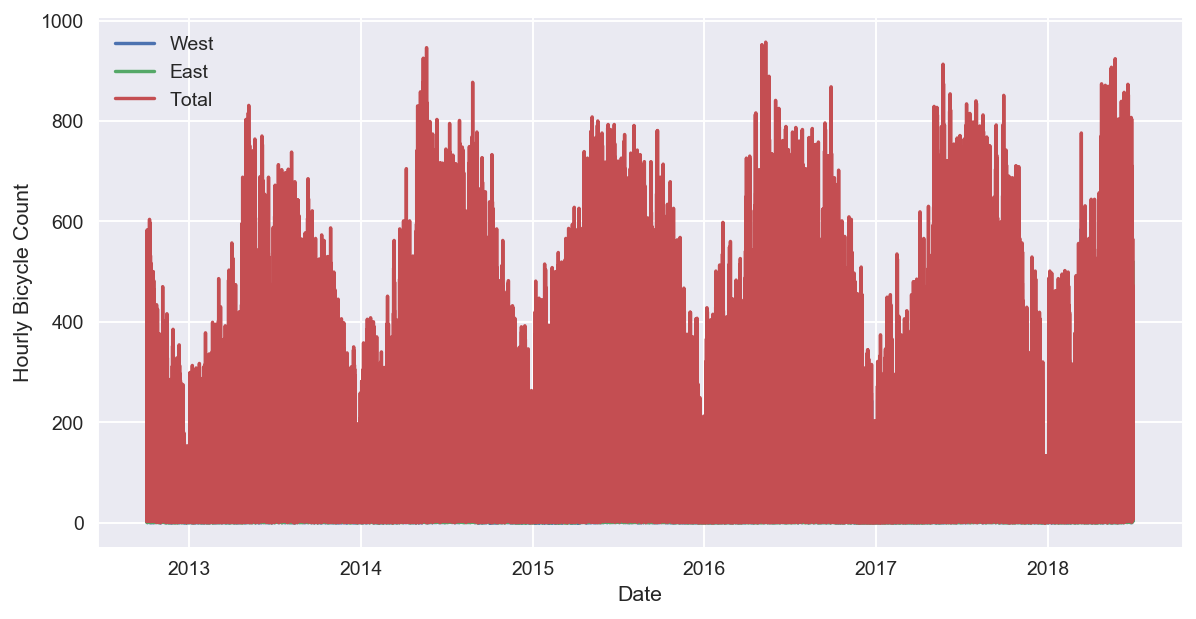

In [19]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0,0.5,'Weekly bicycle count')

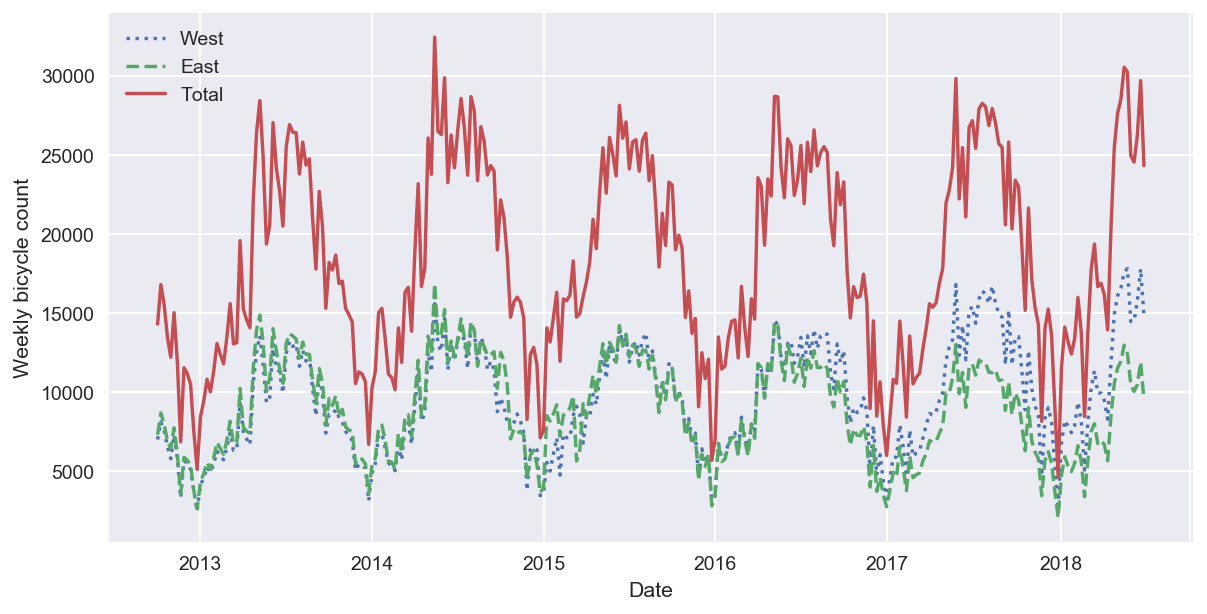

In [20]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

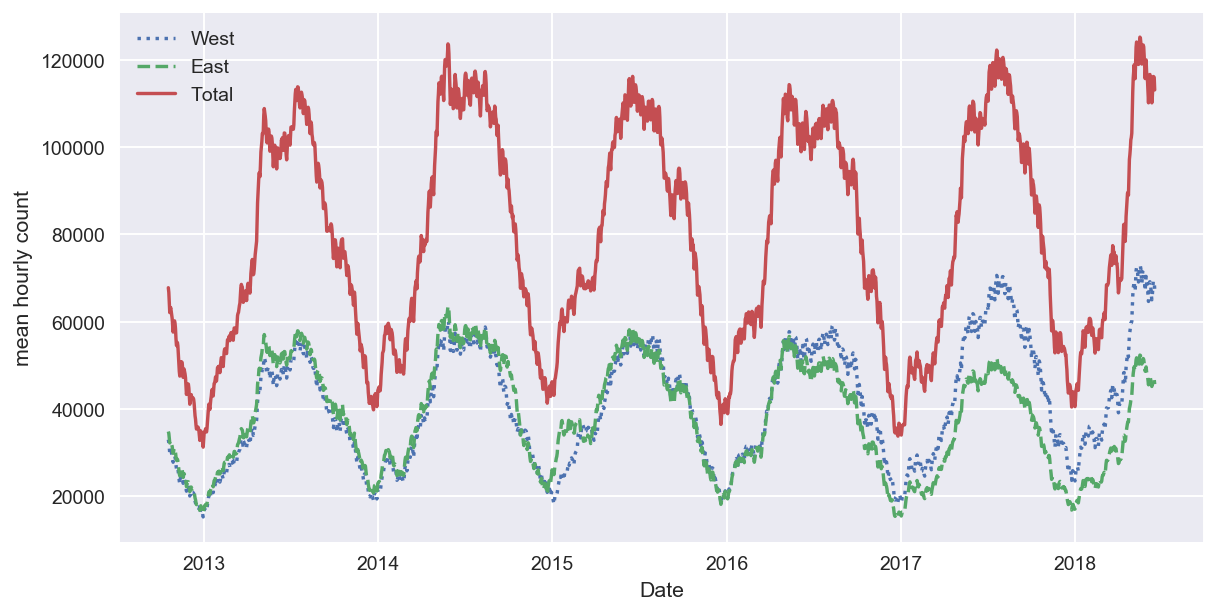

In [21]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

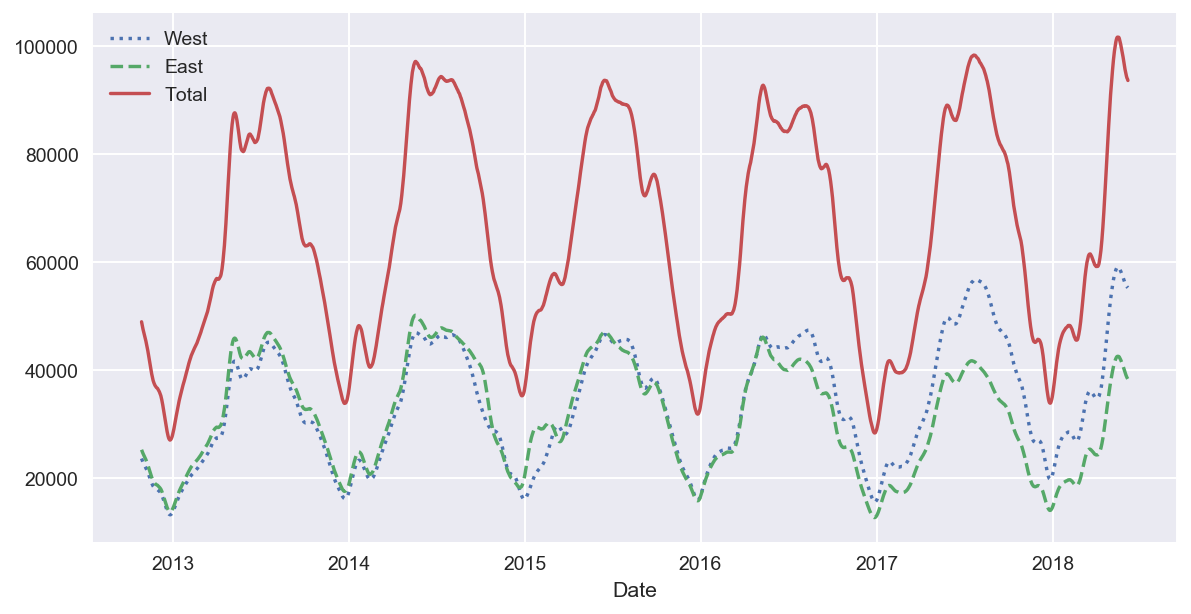

In [22]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [11]:
by_time = data.groupby(data.index.time).mean()

In [12]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

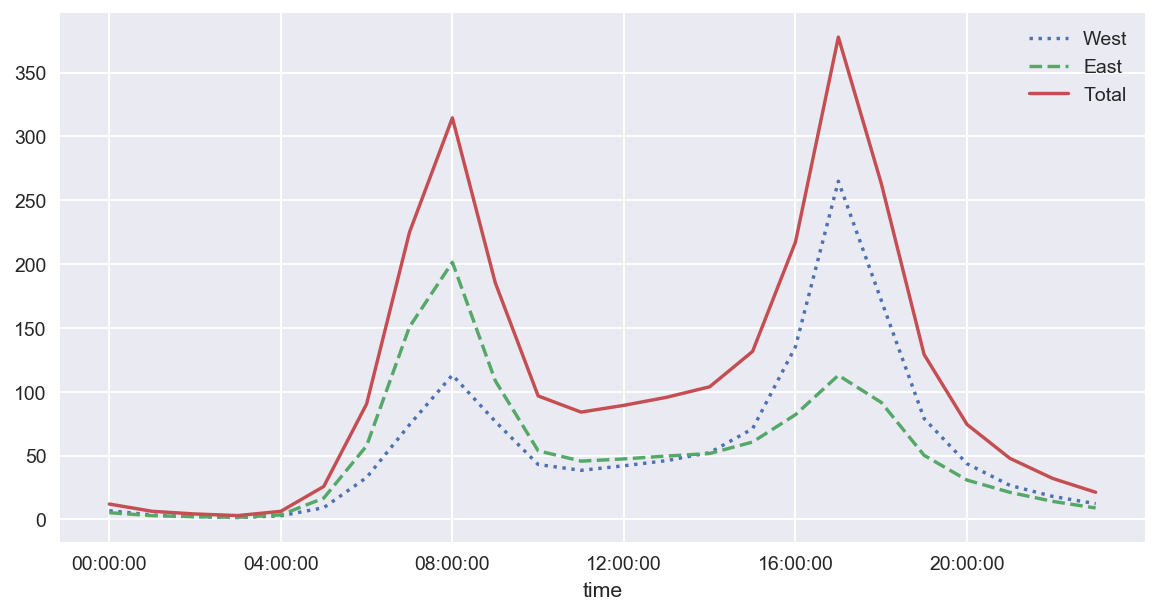

In [23]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

xticks の値で index を探して、それを xticks として plot している。
xticks の 0 は index の 0 番目、すなわち Mon となる。

,West,East,Total
Mon,67.893255,60.570792,128.464047
Tues,72.608168,65.434486,138.042654
Wed,72.106667,64.703472,136.810139
Thurs,67.493056,61.649861,129.142917
Fri,61.201584,55.596694,116.798277
Sat,29.413472,31.789861,61.203333
Sun,27.801562,30.821782,58.623344


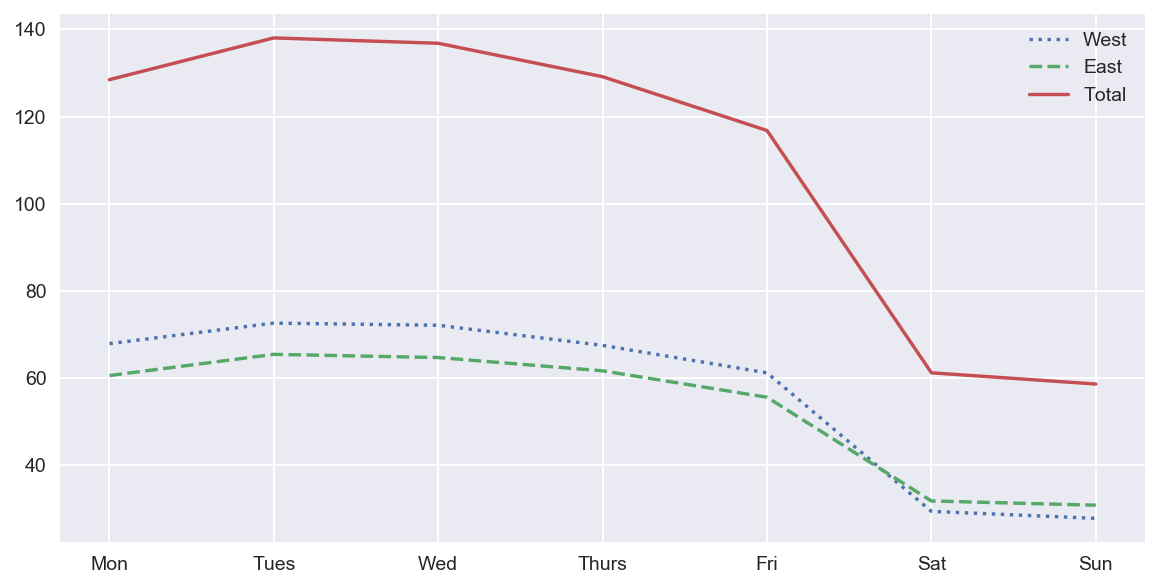

In [57]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(xticks=[0,1,2,3,4,5,6], style=[':', '--', '-'], use_index=True)
by_weekday

,West,East,Total
Date,,,
0,67.893255,60.570792,128.464047
1,72.608168,65.434486,138.042654
2,72.106667,64.703472,136.810139
3,67.493056,61.649861,129.142917
4,61.201584,55.596694,116.798277
5,29.413472,31.789861,61.203333
6,27.801562,30.821782,58.623344


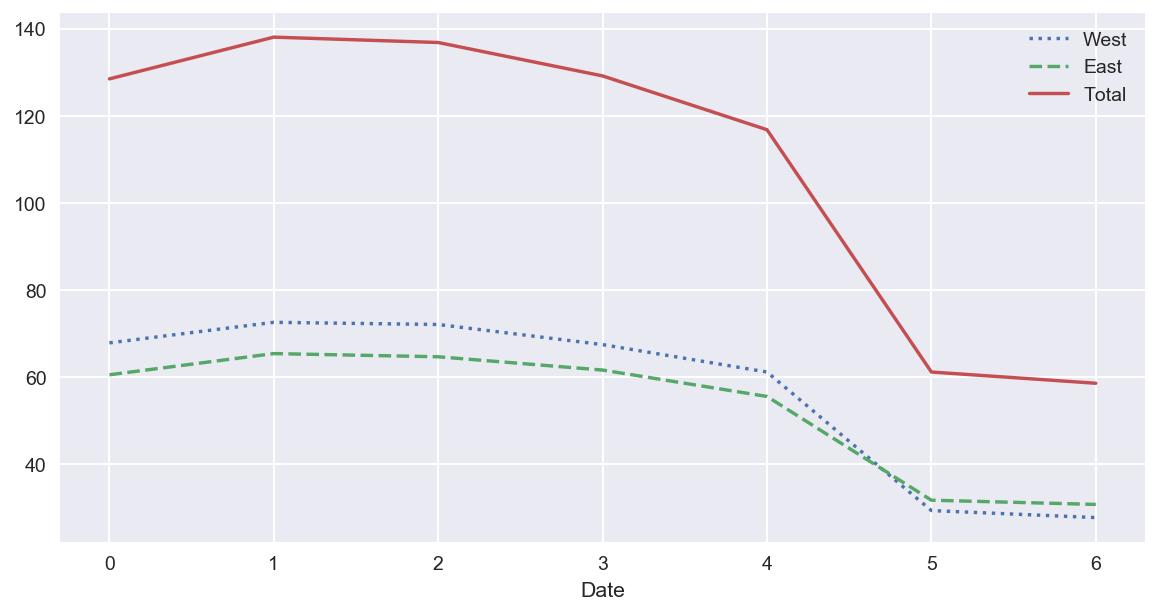

In [58]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.plot(xticks=[0,1,2,3,4,5,6], style=[':', '--', '-'], use_index=True)
by_weekday

In [63]:
data.index.weekday

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', name='Date', length=50328)

In [60]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekend', 'Weekend',
       'Weekend'], dtype='<U7')

In [62]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

West        East       Total
Weekday 00:00:00    5.677570    4.524032   10.201602
        01:00:00    2.652203    2.345794    4.997997
        02:00:00    1.658879    1.717623    3.376502
        03:00:00    1.257677    1.463284    2.720961
        04:00:00    3.121495    4.177570    7.299065
        05:00:00   11.488652   21.580774   33.069426
        06:00:00   42.443925   77.341121  119.785047
        07:00:00   97.971963  204.359146  302.331108
        08:00:00  147.653538  269.373832  417.027370
        09:00:00   92.638611  134.694723  227.333333
        10:00:00   42.968604   53.894456   96.863059
        11:00:00   33.100868   39.279225   72.380094
        12:00:00   35.603206   39.314629   74.917836
        13:00:00   39.546061   41.441923   80.987984
        14:00:00   47.839786   43.969960   91.809746
        15:00:00   74.164219   57.078772  131.242991
        16:00:00  166.096128   89.437250  255.533378
        17:00:00  350.750334  136.798398  487.548732
        18:00:00  224.821095  111.507343  336.328438
        19:00:00   99.644192   59.183578  158.827770
        20:00:00   52.670227   35.348465   88.018692
        21:00:00   31.110814   24.193591   55.304406
        22:00:00   20.170895   15.648865   35.819760
        23:00:00   13.096128    9.482644   22.578772
Weekend 00:00:00    9.545910    6.944908   16.490818
        01:00:00    5.295492    4.292154    9.587646
        02:00:00    3.324916    3.021886    6.346801
        03:00:00    1.716194    1.926544    3.642738
        04:00:00    2.078464    1.749583    3.828047
        05:00:00    3.245409    4.240401    7.485810
        06:00:00    8.671119    8.328881   17.000000
        07:00:00   14.470785   16.916528   31.387312
        08:00:00   26.624374   31.497496   58.121870
        09:00:00   36.976628   43.454090   80.430718
        10:00:00   42.921536   53.320534   96.242070
        11:00:00   51.676127   61.450751  113.126878
        12:00:00   57.891486   67.459098  125.350584
        13:00:00   62.302170   70.053422  132.355593
        14:00:00   63.383973   70.664441  134.048414
        15:00:00   62.979967   69.353923  132.333890
        16:00:00   58.173623   63.382304  121.555927
        17:00:00   50.275459   52.961603  103.237062
        18:00:00   38.590985   41.908180   80.499165
        19:00:00   27.233723   27.574290   54.808013
        20:00:00   20.891486   19.317195   40.208681
        21:00:00   15.410684   13.632721   29.043406
        22:00:00   12.422371   10.140234   22.562604
        23:00:00   10.305509    7.535893   17.841402

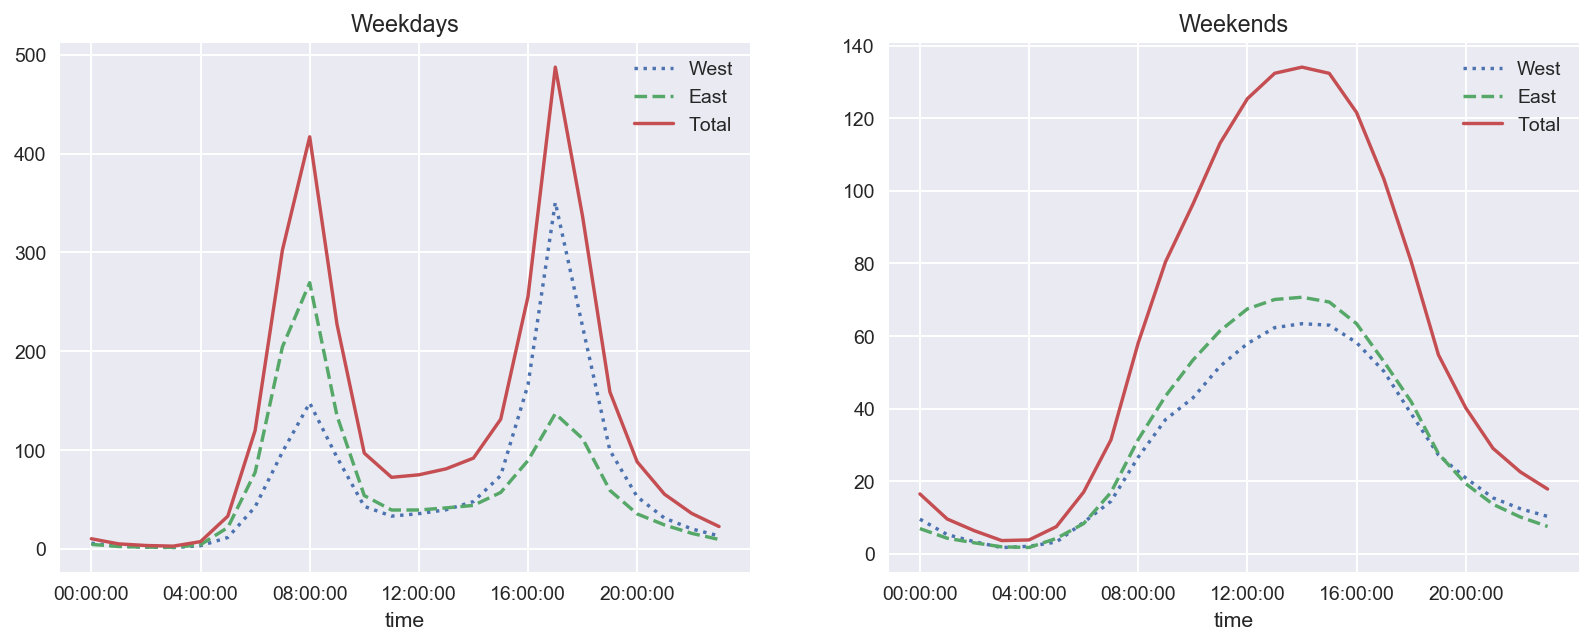

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);